<a href="https://colab.research.google.com/github/ahcamachod/1922-clustering-kmeans-dbscan-meanshift/blob/main/clustering_kmeans_dbscan_meanshift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering: KMeans, DBSCAN y Mean Shift**

En este notebook estaremos ejecutando diversos métodos para la clusterización de datos.

Utilizaremos una base de datos disponible en Kaggle llamada *Customer Personality Analysis*.

El dataset utilizado se puede acceder en el siguiente link: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

### **Procedimientos:**
1. Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab
2. Importar bibliotecas de los métodos a utilizar
3. Cargar el dataset en un DataFrame
4. Consultar información sobre las variables del Dataframe
5. Preprocesamiento:
    - Eliminar variables innecesarias o que no permitan leer el dataframe
    - Tratamiento de variables con valores faltantes
    - Tratamiento de datos extremos y datos atípicos
    - Normalizar los valores de todas las variables
6. Ejemplo básico de entrenamiento de un modelo
    - Definir los feactures
    - Elegimos el modelo
    - Probamos el modelo
    - Probamos la exactitud del modelo
    - Calculamos taza de aciertos
7. Entrenamiento de modelo con muestras de pruebas proporcionales
    - Estratificación proporcional de las muestras de entrada
8. Estimador lineal para un dataset de cumplimento de entrega de proyectos
9. Estimador no lineal
10. Dummy classifiers y Árboles de decisión
    - El clasificador Dummy
    - Arbol de decisión con y sin datos estandarizados
    - Diagrama de árbol de decisión y sus parámetros

### **1. Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab**

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# pip install -r "/ruta del archivo en Google drive/requirements.txt"

In [54]:
# How can I suppresed Python warnings in Jupyter Notebook
# Why not just set n_init=10 explicitly and retain the same value as the default and get rid of those warnings?
import warnings
warnings.filterwarnings('ignore')

### **2. Importar bibliotecas de los métodos a utilizar**

In [55]:
# Las versiones de las bibliotecas que usaremos son las siguientes:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# pip: pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

print(f'matplotlib --> {matplotlib.__version__}')
print(f'pandas --> {pd.__version__}')
print(f'numpy --> {np.__version__}')
print(f'seaborn --> {sns.__version__}')
print(f'sklearn --> {sklearn.__version__}')

matplotlib --> 3.7.1
pandas --> 1.5.3
numpy --> 1.23.5
seaborn --> 0.12.2
sklearn --> 1.2.2


### **3. Cargar el dataset en un dataframe**

In [56]:
ruta= '/content/drive/MyDrive/Colab Notebooks/231120-1_clustering_k_means_dbscan_mean_shift/datasets/marketing_campaign.csv'
datos_clientes_marketing_df = pd.read_csv(ruta, sep = "\t")
# Obervación: el separador de columnas es \t

### **4. Consultar información sobre las variables del Dataframe**

In [57]:
# datos_clientes_marketing_df.head()

In [58]:
datos_clientes_marketing_df.shape

(2240, 29)

In [59]:
datos_clientes_marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Aula 1

### 1.2 Importando los datos

### 1.3 Analizando y transformando los datos

In [60]:
columnas = {'Year_Birth':'Ano_Nacimiento', 'Education':'Escolaridad', 'Marital_Status':'Estado_Civil',
            'Income':'Renta_Anual', 'Kidhome':'CtNinos','Teenhome':'CtAdolescentes', 'Dt_Customer':'Primera_Compra',
            'Recency':'Recencia', 'MntWines':'GastoVinos', 'MntFruits':'GastoFrutas','MntMeatProducts':'GastoCarnes',
            'MntFishProducts':'GastoPescado', 'MntSweetProducts':'GastoGolosinas','MntGoldProds':'GastoOro',
            'NumDealsPurchases':'NumComprasConDescuento', 'NumWebPurchases':'NumComprasOnline',
            'NumCatalogPurchases':'NumComprasCatalogo', 'NumStorePurchases':'NumComprasTienda',
            'NumWebVisitsMonth':'NumVisitasOnlineMes','Z_CostContact':'CostoContacto','Z_Revenue':'Ingresos','AcceptedCmp3':'AceptaCmp3', 'AcceptedCmp4':'AceptaCmp4',
            'AcceptedCmp5':'AceptaCmp5', 'AcceptedCmp1':'AceptaCmp1', 'AcceptedCmp2':'AceptaCmp2',
            'Complain':'Quejas','Response':'AceptaCmpActual'}

**Clientes**

*ID*: Identificación única del cliente.

*Ano_Nacimiento*: Año de nacimiento del cliente.

*Escolaridad*: Nivel educativo del cliente.

*Estado_Civil*: Estado civil del cliente.

*Renta_Anual*: Renta anual del cliente.

*CtNinos*: Número de niños en el hogar.

*CtAdolescentes*: Número de adolescentes en el hogar.

*Primera_Compra*: Fecha en que compró por primera vez

*Recencia*: Hace cuántos días realizó la última compra.

*Quejas*: 1 si el cliente se quejó en los últimos 2 años, 0 en otro caso.

**Productos**

*GastoVinos*: Gasto en vinos en los últimos 2 años.

*GastoFrutas*: Gasto en frutas en los últimos 2 años.

*GastoCarnes*: Gasto en carne en los últimos 2 años.

*GastoPescado*: Gasto en pescado en los últimos 2 años.

*GastoGolosinas*: Gasto en golosinas en los últimos 2 años.

*GastoOro*: Gasto en productos de oro en los últimos 2 años.

**Promociones**

*NumComprasConDescuento*: Número de compras con descuento.

*AceptaCmp1*: 1 si el cliente aceptó la oferta en la primera campaña, 0 en otro caso.

*AceptaCmp2*: 1 si el cliente aceptó la oferta en la segunda campaña, 0 en otro caso.

*AceptaCmp3*: 1 si el cliente aceptó la oferta en la tercera campaña, 0 en otro caso.

*AceptaCmp4*: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en otro caso.

*AceptaCmp5*: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en otro caso.

*AceptaCmpActual*: 1 si el cliente aceptó la oferta en la última campaña, 0 en otro caso.

**Compras**

*NumComprasOnline*: Número de compras realizadas en la página web.

*NumComprasCatalogo*: Número de compras realizadas a través del catálogo.

*NumComprasTienda*: Número de compras realizadas en la tienda.

*NumVisitasOnlineMes*: Número de visitas realizadas a la página web.

In [61]:
datos_clientes_marketing_df = datos_clientes_marketing_df.rename(columns = columnas)

In [62]:
datos_clientes_marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      2240 non-null   int64  
 1   Ano_Nacimiento          2240 non-null   int64  
 2   Escolaridad             2240 non-null   object 
 3   Estado_Civil            2240 non-null   object 
 4   Renta_Anual             2216 non-null   float64
 5   CtNinos                 2240 non-null   int64  
 6   CtAdolescentes          2240 non-null   int64  
 7   Primera_Compra          2240 non-null   object 
 8   Recencia                2240 non-null   int64  
 9   GastoVinos              2240 non-null   int64  
 10  GastoFrutas             2240 non-null   int64  
 11  GastoCarnes             2240 non-null   int64  
 12  GastoPescado            2240 non-null   int64  
 13  GastoGolosinas          2240 non-null   int64  
 14  GastoOro                2240 non-null   

**Valores nulos:**

In [63]:
datos_clientes_marketing_df.isna().sum()

ID                         0
Ano_Nacimiento             0
Escolaridad                0
Estado_Civil               0
Renta_Anual               24
CtNinos                    0
CtAdolescentes             0
Primera_Compra             0
Recencia                   0
GastoVinos                 0
GastoFrutas                0
GastoCarnes                0
GastoPescado               0
GastoGolosinas             0
GastoOro                   0
NumComprasConDescuento     0
NumComprasOnline           0
NumComprasCatalogo         0
NumComprasTienda           0
NumVisitasOnlineMes        0
AceptaCmp3                 0
AceptaCmp4                 0
AceptaCmp5                 0
AceptaCmp1                 0
AceptaCmp2                 0
Quejas                     0
CostoContacto              0
Ingresos                   0
AceptaCmpActual            0
dtype: int64

In [64]:
nulos= 24/2240
print(f'porcentaje de registros con valores nulos es de {np.round(nulos*100,2)} %')

porcentaje de registros con valores nulos es de 1.07 %


Como las filas con datos nulos es de aprox 1% podemos simplemente eliminarlas pero generalmente el tratamiento de datos nulos es otro proceso de análisis y trasnformaciones.

In [65]:
datos_clientes_marketing_df.dropna(axis = 0, inplace = True)

In [66]:
# datos_clientes_marketing_df.isna().sum()

**Correlación entre variables:**

In [67]:
# Consultamos la matriz de correlación de las variables para observar la relación entre pares de variables
matriz_correlaciones = datos_clientes_marketing_df.corr()
# matriz_correlaciones

Con la matriz de correlación tenemos una idea de la correlación entre pares de variables.
- Valore sercanos a uno (1) indican correlación directamente proporcional entre el par (cuando una de las variables crece la otra tambien crece).
- Valores sercanos a menos uno (-1) indican correlación inversamente proporcional entre el par (cuando una crece la otra variable decrece)
- Valores sercanos a cero (0) indican que no hay correlación entre las dos variables.

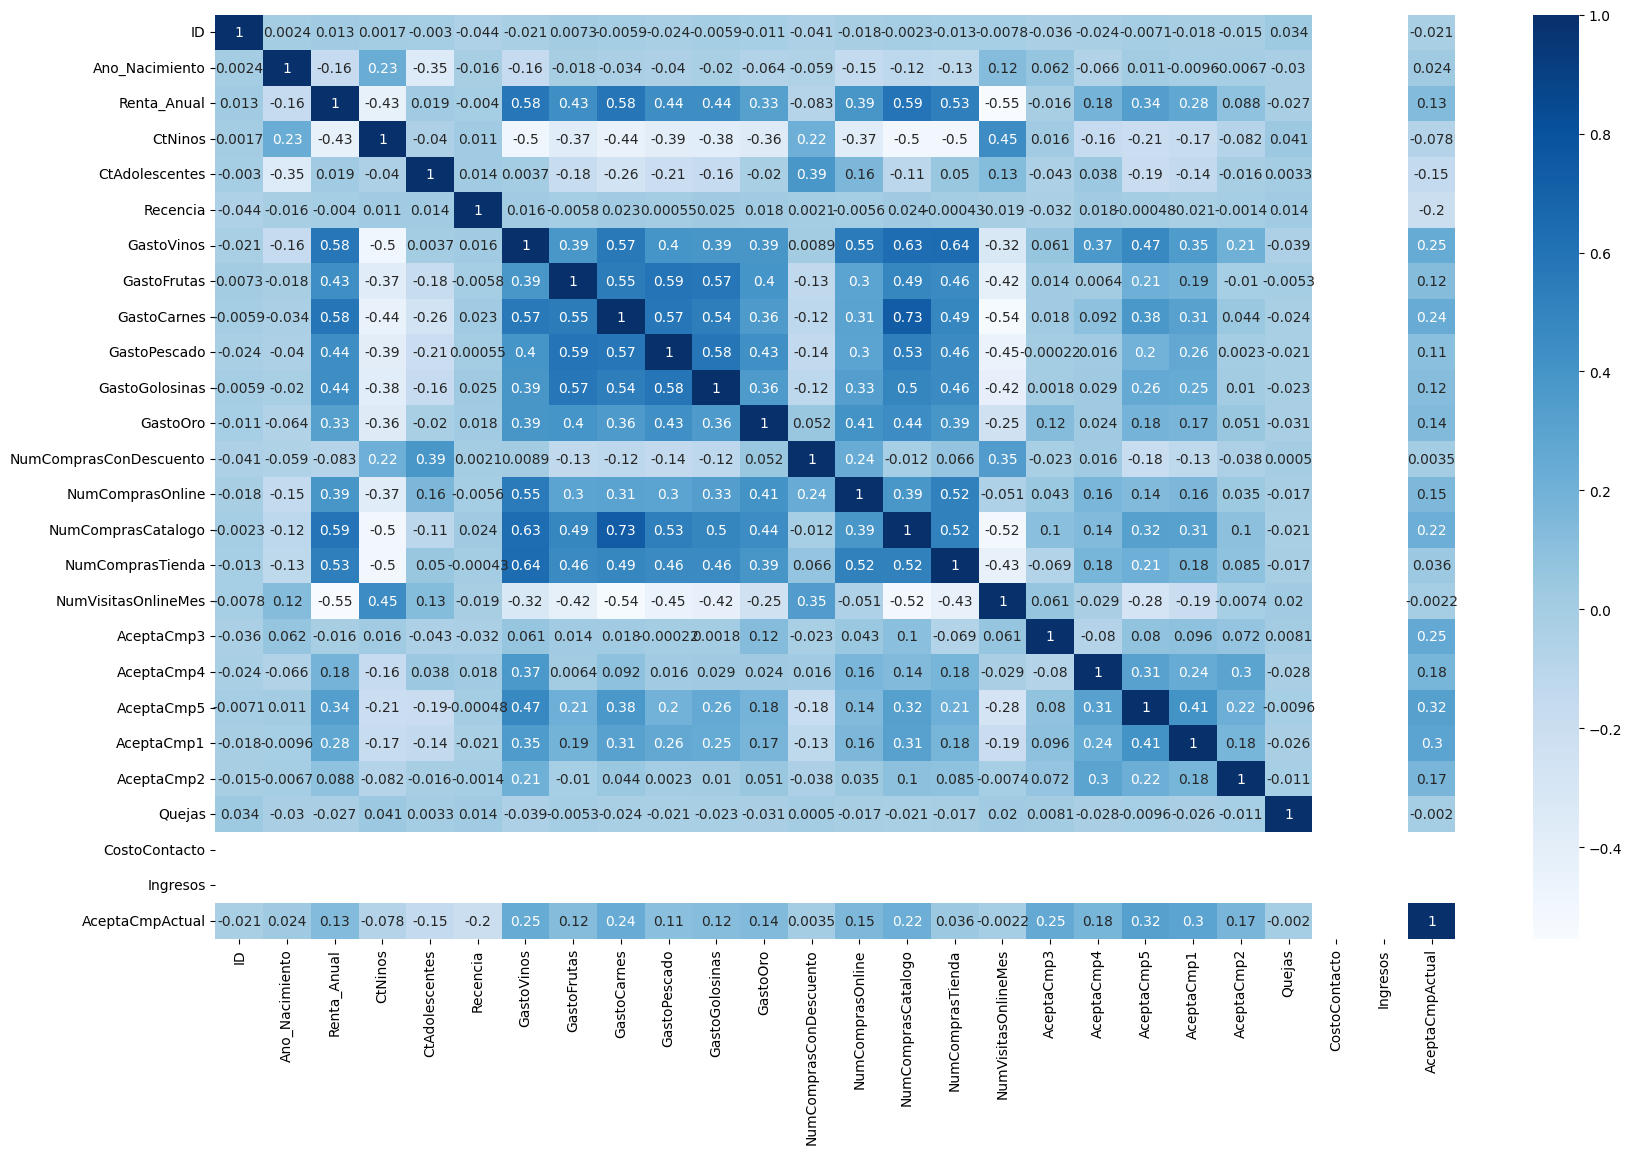

In [68]:
# Como la tabla anterior no es sencilla de observar por la gran cantidad de variables usamos un diagrama  que simplifique la observación
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,12))
grafico_correlacion = sns.heatmap(matriz_correlaciones, cmap = 'Blues', annot = True)

In [69]:

datos_clientes_marketing_df.CostoContacto.value_counts()

3    2216
Name: CostoContacto, dtype: int64

In [70]:
datos_clientes_marketing_df.Ingresos.value_counts()

11    2216
Name: Ingresos, dtype: int64

**CostoContacto** e **Ingresos** tienen valores contantes por eso aparecen en blanco, por lo tanto son candidatos a ser eliminadas por no aportar niguna información útil. Tampoco la variable idCliente aporta información útil así que es otra variable candidata a ser eliminada del dataframe.

### 1.4 Selección de atributos

In [71]:
X = datos_clientes_marketing_df.drop(columns = ['ID','CostoContacto','Ingresos', 'Primera_Compra', 'Quejas', 'Escolaridad', 'Estado_Civil'], axis =1)
# X.head()

In [72]:
# La variable año de nacimiento no es tan útil como por ejemplo la edad del cliente, por eso realizamos la siguiente transformación
from datetime import datetime
anno_actual = datetime.today().year
X['Edad'] = anno_actual - datos_clientes_marketing_df.Ano_Nacimiento
X.drop(columns = ['Ano_Nacimiento'], axis = 1, inplace = True)
# X.head()

(0.0, 150000.0)

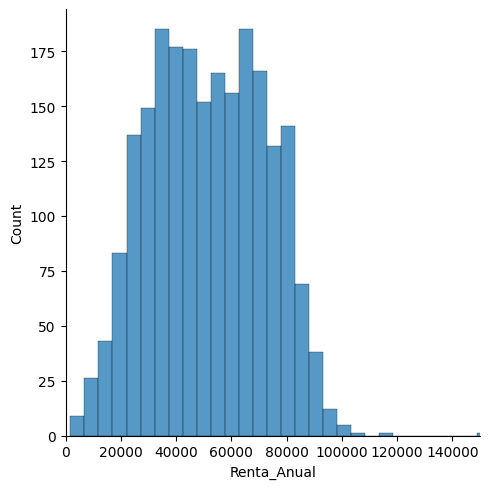

In [73]:
sns.displot(datos_clientes_marketing_df.Renta_Anual)
plt.xlim(0, 150000) # Ajustamos el limite horizontal del grafico para una mejor presentación

Observamos que la variable Ingresos posee una distribución normal, y podemos seguir analizando mas variables pero el objetivo de este proyecto es solo enfocarnos en crear closters y no se requiere analizar y trasnformar todas las varibles involucradas.

### 1.5 Normalización

La normalización es la transformación de los valores de variables cuantitativas a valores entre 0 y 1, con el fin de que rangos de valores distintos no alteren los cálculos. Vamos a normalizar primero paso a paso para entender el proceso y luego usando librerias

In [74]:
# Normalizacion sin usar librerias
atributos = X.columns
X_normalizado = X.copy()
for atributo in atributos:
  X_normalizado[atributo] = (X[atributo] - min(X[atributo]))/(max(X[atributo]) - min(X[atributo]))
X_normalizado.head()

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,...,0.357143,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,1.0,0.378641
1,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,...,0.035714,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.407767
2,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,...,0.071429,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.300971
3,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,...,0.000000,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.116505
4,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,...,0.107143,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.145631


In [75]:
# Normalización usando libreria
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalizado = scaler.fit_transform(X)
X_normalizado = pd.DataFrame(X_normalizado, columns = X.columns)
X_normalizado.head()

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,...,0.357143,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,1.0,0.378641
1,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,...,0.035714,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.407767
2,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,...,0.071429,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.300971
3,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,...,0.000000,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.116505
4,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,...,0.107143,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.145631


**Otros métodos para reescalar los datos:**

Existen diversos métodos posibles para reescalar los datos ya implementados en la biblioteca Scikit-learn, como por ejemplo el método StandardScaler().

Este método escala nuestros datos, sustrayendo el promedio de cada uno de los atributos y dividiendo entre el desvío típico, siguiendo la siguiente fórmula:

$$X_{std} = {X - mean \over sd}$$


In [76]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_std = standard_scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = X.columns)
X_std.head()

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,...,2.504712,-0.554143,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,2.377952,0.986443
1,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,...,-0.571082,-1.169518,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.420530,1.236801
2,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,...,-0.229327,1.291982,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.420530,0.318822
3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,...,-0.912837,-0.554143,0.280829,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.420530,-1.266777
4,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,...,0.112428,0.061232,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.420530,-1.016420


**Lo importante en esta sección:**

- Importar los datos;
- Visualizar el número de atributos y muestras de nuestros datos;
- Visualizar las primeras muestras de los datos;
- Extraer parámetros estadísticos básicos;
- Generar una matriz de correlación para verificar la relación entre los atributos;
- Normalizar el conjunto de datos.

## Aula 2

### 2.2 KMeans

El método KMeans se basa en la realización de promedios para la definición de los centros de los k grupos.

Comenzando con una cantidad pequeña de clusters es posible evaluar mejor los resultados de cada uno, permitiendo inferir si existe o no la necesidad de aumentar el número de grupos. Hay que recordar que la selleción del númeo optimo de clusters es toda una técnica que no será tratada en eset proyecto por simplificar la comprensión de la clusterización.

In [77]:
# Caso para tres clusters
from sklearn.cluster import KMeans
agrupador = KMeans(n_clusters = 3)
agrupador.fit (X_normalizado)


KMeans(n_clusters=3)

In [78]:
agrupador.labels_

array([0, 2, 1, ..., 1, 1, 0], dtype=int32)

In [79]:
# Consultamos las etiquetas o identificadores de los closters creados y la cantidad de registros asignados a cada cluster
datos_clientes_marketing_df['Clusters_KMeans'] = agrupador.labels_
datos_clientes_marketing_df.Clusters_KMeans.value_counts()

2    1085
1     798
0     333
Name: Clusters_KMeans, dtype: int64

In [80]:
# Caso para cuatro closters
agrupador = KMeans(n_clusters = 4)
agrupador.fit (X_normalizado)
datos_clientes_marketing_df['Clusters_KMeans'] = agrupador.labels_
datos_clientes_marketing_df.Clusters_KMeans.value_counts()

2    1043
3     768
1     237
0     168
Name: Clusters_KMeans, dtype: int64

### 2.3 Gráficando los clusters en 2D

In [81]:
# Gráfico para tres clusters
import plotly.graph_objects as go
agrupador = KMeans(n_clusters = 3)
agrupador.fit (X_normalizado)
labels = agrupador.labels_
figura = go.Figure()
figura.add_trace(go.Scatter(
                              x = datos_clientes_marketing_df['Renta_Anual'],
                              y = datos_clientes_marketing_df['GastoVinos'],
                              mode = 'markers',
                              marker = dict(color=labels.astype(np.float)),
                              text = labels))
figura.show()

In [82]:
# Gráfico para cuatro clusters
import plotly.graph_objects as go
agrupador = KMeans(n_clusters = 4)
agrupador.fit (X_normalizado)
labels = agrupador.labels_
figura = go.Figure()
figura.add_trace(go.Scatter(
                              x = datos_clientes_marketing_df['Renta_Anual'],
                              y = datos_clientes_marketing_df['GastoVinos'],
                              mode = 'markers',
                              marker = dict(color=labels.astype(np.float)),
                              text = labels))
figura.show()

### 2.4 Gráficando los clusters en 3D

In [83]:
# Gráfico 3D para cuatro clusters agregando como tercera dimensión la edad del dataframe X
import plotly.graph_objects as go
agrupador = KMeans(n_clusters = 4)
agrupador.fit (X_normalizado)
labels = agrupador.labels_
figura = go.Figure()
figura.add_trace(go.Scatter3d(
                              x = datos_clientes_marketing_df['Renta_Anual'],
                              y = datos_clientes_marketing_df['GastoVinos'],
                              z = X['Edad'],
                              mode = 'markers',
                              marker = dict(color=labels.astype(np.float)),
                              text = labels))
# figura.show()

In [84]:
# Gráfico 3D para cuatro clusters agregando como tercera dimensión la edad del dataframe X
import plotly.graph_objects as go
agrupador = KMeans(n_clusters = 4)
agrupador.fit (X_normalizado)
labels = agrupador.labels_
figura = go.Figure()
# Limitamos el rango de x para que se muestre un gráfico de tamaño ajustado a la ventana (Recordemos usar el menú de controles de vistas)
figura.add_trace(go.Scatter3d(
                              x = datos_clientes_marketing_df['Renta_Anual'].loc[datos_clientes_marketing_df['Renta_Anual']<110000],
                              y = datos_clientes_marketing_df['GastoVinos'],
                              z = X['Edad'],
                              mode = 'markers',
                              marker = dict(color=labels.astype(np.float)),
                              text = labels))
# establecemos los títulos de cada eje
figura.update_layout(scene =dict(xaxis_title = 'Renta anual',
                                 yaxis_title = 'Gastos en vinos',
                                 zaxis_title = 'Edad del cliente'))
figura.show()

### 2.5 Visualizando los centroides

In [85]:
centroides = pd.DataFrame(agrupador.cluster_centers_, columns = X.columns)
centroides

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,0.074264,0.232068,0.191983,0.327494,0.231884,0.152323,0.127191,0.162765,0.109511,0.165477,...,0.120856,0.409607,0.305907,0.253165,0.071730,-2.775558e-17,0.088608,0.016878,1.000000e+00,0.263775
1,0.054112,0.390068,0.253616,0.515220,0.042457,0.027461,0.019752,0.030076,0.020446,0.054507,...,0.025658,0.265930,0.319769,0.047252,0.010608,8.326673e-17,0.002893,0.001929,-3.330669e-16,0.243458
2,0.120801,0.023810,0.071429,0.500361,0.586367,0.284697,0.270576,0.299733,0.250250,0.241618,...,0.215986,0.635531,0.150595,0.142857,0.386905,9.642857e-01,0.440476,0.113095,5.714286e-01,0.262598
3,0.096056,0.033592,0.309432,0.518258,0.329899,0.233961,0.153031,0.260862,0.180119,0.215992,...,0.154854,0.657921,0.206654,0.038760,0.091731,-1.526557e-16,0.056848,0.006460,-3.330669e-16,0.291551


In [86]:
# Para graficar los centroides con valores originales se requiere volver a el rango que tenien los valores de las variables antes de normalizarlas
inverso = scaler.inverse_transform(centroides)
centros = pd.DataFrame(inverso, columns= X.columns)
centros.head()

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,51111.046414,0.464135,0.383966,32.421941,346.202532,30.312236,219.405063,42.156118,28.691983,53.118143,...,3.383966,5.324895,6.118143,0.253165,0.071730,-2.775558e-17,0.088608,0.016878,1.000000e+00,54.168776
1,37710.828351,0.780135,0.507232,51.006750,63.387657,5.464802,34.071360,7.789778,5.356798,17.496625,...,0.718419,3.457088,6.395371,0.047252,0.010608,8.326673e-17,0.002893,0.001929,-3.330669e-16,52.076181
2,82055.250000,0.047619,0.142857,49.535714,875.446429,56.654762,466.744048,77.630952,65.565476,77.559524,...,6.047619,8.261905,3.011905,0.142857,0.386905,9.642857e-01,0.440476,0.113095,5.714286e-01,54.047619
3,65601.007752,0.067183,0.618863,51.307494,492.538760,46.558140,263.978036,67.563307,47.191214,69.333333,...,4.335917,8.552972,4.133075,0.038760,0.091731,-1.526557e-16,0.056848,0.006460,-3.330669e-16,57.029716


In [87]:
figura = go.Figure()
figura.add_trace(go.Scatter3d( x = centros['Renta_Anual'],
                               y = centros['GastoVinos'],
                                z = centros['Edad'],
                               mode = 'markers',
                               marker = dict(color  = 'red'),
                               text = [0,1,2,3]))
figura.show()

Una vez realizada la clusterización con el método fit(), podemos prever cómo determinada muestra sería clasificada a través de la utilización del método predict(), conforme se observa en el siguiente ejemplo:

In [88]:
nueva_muestra = [2,0,1.5,27,4,14,38,0.7,10, 1, 4, 16,12]
# labels_nueva_muestra = agrupador.predict(nueva_muestra)
# print(labels_nueva_muestra)

**Lo importante en esta sección:**

- Importar la biblioteca K-Means de Scikit-learn;
- Realizar la clusterización K-Means para dos valores de k;
- Visualizar la diferencia que ocurre en la clusterización debido a la inicialización de los clusters;
- Visualizar las agrupaciones en dos dimensiones;
- Visualizar las agrupaciones en tres dimensiones;
- Agregar el nombre a los ejes de nuestros clusters en el gráfico;
- Agregar el centro de los grupos en el gráfico.

## Aula 3

### 3.2 DBSCAN

In [89]:
# Instanciaremos DBSCAN para diferentes valores de eps. Comenzaremos con eps=0.1
from sklearn.cluster import DBSCAN

agrupador = DBSCAN(eps=0.1, min_samples=200, metric='euclidean')
agrupador.fit(X_normalizado)
datos_clientes_marketing_df['Cluster_DBSCAN'] = agrupador.labels_
datos_clientes_marketing_df.Cluster_DBSCAN.value_counts()

-1    2216
Name: Cluster_DBSCAN, dtype: int64

La etiqueta (label) -1 indica que todos los puntos fueron clasificados como ruido y no "pertenecen" a ningún cluster pero tampoco logró formar ningun cluster. Ahora, instanciaremos DBSCAN para los valores de eps=2.1 y eps=1.1 respectivamente.

In [90]:
grupador = DBSCAN(eps=2.1, min_samples=200, metric='euclidean')
agrupador.fit(X_normalizado)
datos_clientes_marketing_df['Cluster_DBSCAN'] = agrupador.labels_
datos_clientes_marketing_df.Cluster_DBSCAN.value_counts()

-1    2216
Name: Cluster_DBSCAN, dtype: int64

La etiqueta (label) -1 indica que todos los puntos fueron clasificados como ruido y no "pertenecen" a ningún cluster pero tampoco logró formar ningun cluster. Ahora, instanciaremos DBSCAN para los valores de eps=2.1 y eps=1.1 respectivamente.

### 3.3 Ajuste de hiperparámetros y visualización

Vamos a probar varios valores de eps para poder visualizar cuántos clusters se generan a partir de los diversos valores.

In [91]:
rango = [i for i in np.arange(0.1,1.5,0.05)]
for e in rango:
  agrupador = DBSCAN(eps=e, min_samples=200, metric='euclidean')
  agrupador.fit(X_normalizado)
  datos_clientes_marketing_df['Cluster_DBSCAN'] = agrupador.labels_
  print(f"El epsilon es: {e}, y hay {len(datos_clientes_marketing_df.Cluster_DBSCAN.value_counts())} clusters.")

El epsilon es: 0.1, y hay 1 clusters.
El epsilon es: 0.15000000000000002, y hay 1 clusters.
El epsilon es: 0.20000000000000004, y hay 1 clusters.
El epsilon es: 0.25000000000000006, y hay 1 clusters.
El epsilon es: 0.30000000000000004, y hay 1 clusters.
El epsilon es: 0.3500000000000001, y hay 2 clusters.
El epsilon es: 0.40000000000000013, y hay 2 clusters.
El epsilon es: 0.45000000000000007, y hay 3 clusters.
El epsilon es: 0.5000000000000001, y hay 3 clusters.
El epsilon es: 0.5500000000000002, y hay 2 clusters.
El epsilon es: 0.6000000000000002, y hay 2 clusters.
El epsilon es: 0.6500000000000001, y hay 2 clusters.
El epsilon es: 0.7000000000000002, y hay 2 clusters.
El epsilon es: 0.7500000000000002, y hay 2 clusters.
El epsilon es: 0.8000000000000002, y hay 2 clusters.
El epsilon es: 0.8500000000000002, y hay 2 clusters.
El epsilon es: 0.9000000000000002, y hay 2 clusters.
El epsilon es: 0.9500000000000003, y hay 2 clusters.
El epsilon es: 1.0000000000000004, y hay 2 clusters.
El

In [92]:
# Observamos que con eps en (0.45, 0.5) se generan tres clusters, verifiquemos si podemos hayar mejores valores para el numero de clusters
rango = [i for i in np.arange(0.45,0.5,0.005)]
for e in rango:
  agrupador = DBSCAN(eps=e, min_samples=200, metric='euclidean')
  agrupador.fit(X_normalizado)
  datos_clientes_marketing_df['Cluster_DBSCAN'] = agrupador.labels_
  print(f"El epsilon es: {e}, y hay {len(datos_clientes_marketing_df.Cluster_DBSCAN.value_counts())} clusters.")

El epsilon es: 0.45, y hay 3 clusters.
El epsilon es: 0.455, y hay 3 clusters.
El epsilon es: 0.46, y hay 3 clusters.
El epsilon es: 0.465, y hay 3 clusters.
El epsilon es: 0.47000000000000003, y hay 3 clusters.
El epsilon es: 0.47500000000000003, y hay 3 clusters.
El epsilon es: 0.48000000000000004, y hay 3 clusters.
El epsilon es: 0.48500000000000004, y hay 3 clusters.
El epsilon es: 0.49000000000000005, y hay 3 clusters.
El epsilon es: 0.49500000000000005, y hay 3 clusters.


In [93]:
# Gráfico 3D para tres clusters basados en los mejores resultados vistos anteriormente
import plotly.graph_objects as go
agrupador = KMeans(n_clusters = 3)
agrupador.fit (X_normalizado)
labels = agrupador.labels_
figura = go.Figure()
# Limitamos el rango de x para que se muestre un gráfico de tamaño ajustado a la ventana (Recordemos usar el menú de controles de vistas)
figura.add_trace(go.Scatter3d(
                              x = datos_clientes_marketing_df['Renta_Anual'].loc[datos_clientes_marketing_df['Renta_Anual']<110000],
                              y = datos_clientes_marketing_df['GastoVinos'],
                              z = X['Edad'],
                              mode = 'markers',
                              marker = dict(color=labels.astype(np.float)),
                              text = labels))
# establecemos los títulos de cada eje
figura.update_layout(scene =dict(xaxis_title = 'Renta anual',
                                 yaxis_title = 'Gastos en vinos',
                                 zaxis_title = 'Edad del cliente'))
figura.show()

## Aula 4

### 4.2 Mean Shift

MeanShift también es una técnica de clusterización basada en densidad, solo que ella considera inicialmente cada punto como un cluster y ella comienza a buscar regiones con alta densidad y dependiendo de dónde esté la mayor concentración, entonces hasta allí va a desplazar cada uno de esos puntos, de modo que va a existir entonces ese desplazamiento de los promedios.

Este método de clusterización no requiere parametrizar un número de clusters, ni colocar un valor de eps, ni un número mínimo de muestras, pero sí debemos establecer un ancho de banda, algo análogo al valor de eps, dependiendo del ancho de banda, el algoritmo puede considerar una región de densidad mayor o menor a partir del conjunto de datos. Este método, al igual DBSCAN, busca regiones de alta densidad , Si hay una región con mucha densidad establece: “aquí hay un clúster”, entonces desplaza los promedios de todos esos puntos hacia allí.

In [94]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bw = estimate_bandwidth(X_normalizado, quantile = 0.1)
agrupador = MeanShift(bandwidth=bw)
agrupador.fit(X_normalizado)
datos_clientes_marketing_df['Cluster_MeanShift'] = agrupador.labels_
datos_clientes_marketing_df.Cluster_MeanShift.value_counts()

0     1556
1      141
2       71
3       67
4       54
      ... 
49       1
53       1
65       1
56       1
35       1
Name: Cluster_MeanShift, Length: 70, dtype: int64

In [95]:
# Vamos a establecer un rango para instanciar el algoritmo en diferentes valores de cuantil desde el 5% hasta llegar al 50%.
# ¿En cuál cuantil aparecen 9 clusters?
cuantil = [c for c in np.arange(0.05,0.5, 0.05)]

for c in cuantil:
  bw = estimate_bandwidth(X_normalizado, quantile=c)
  agrupador = MeanShift(bandwidth=bw)
  agrupador.fit(X_normalizado)
  datos_clientes_marketing_df['Cluster_MeanShift'] = agrupador.labels_
  print(f"El cuantil es: {c}, y hay {len(datos_clientes_marketing_df.Cluster_MeanShift.value_counts())} clusters.")

El cuantil es: 0.05, y hay 109 clusters.
El cuantil es: 0.1, y hay 70 clusters.
El cuantil es: 0.15000000000000002, y hay 59 clusters.
El cuantil es: 0.2, y hay 52 clusters.
El cuantil es: 0.25, y hay 37 clusters.
El cuantil es: 0.3, y hay 26 clusters.
El cuantil es: 0.35000000000000003, y hay 16 clusters.
El cuantil es: 0.4, y hay 9 clusters.
El cuantil es: 0.45, y hay 4 clusters.


In [96]:
# Procederemos a ver los labels de los clusters de dicho cuantil.
# ¿Cuántas observaciones fueron clasificadas en el cluster más numeroso?
bw = estimate_bandwidth(X_normalizado, quantile=0.4)
agrupador = MeanShift(bandwidth=bw)
agrupador.fit(X_normalizado)
datos_clientes_marketing_df['Cluster_MeanShift'] = agrupador.labels_
datos_clientes_marketing_df.Cluster_MeanShift.value_counts()

0    2003
1     134
3      23
4      21
5      17
7       9
2       4
6       3
8       2
Name: Cluster_MeanShift, dtype: int64

### 4.3 Visualización de clusters

In [97]:
# Podemos visualizar nuestros clusters para el cuantil que desees. Basta ejecutar el código del paso 3 con otro valor de quantile y proceder a graficar
figura = go.Figure()
figura.add_trace(go.Scatter3d(x=datos_clientes_marketing_df['Renta_Anual'].loc[datos_clientes_marketing_df['Renta_Anual']<=110000],
                            y=datos_clientes_marketing_df['GastoVinos'],
                            z=X['Edad'],
                            mode='markers', marker=dict(color=agrupador.labels_.astype(np.float)),
                            text=agrupador.labels_))
figura.update_layout(scene=dict(xaxis_title='Renta Anual',
                                yaxis_title='Gasto en Vinos',
                                zaxis_title='Edad del cliente'))
figura.show()

**Lo importante de esta sección:**

- Importar la biblioteca Mean Shift de Scikit-learn;
- Realizar la clusterización con el método MeanShift estimando el ancho de banda;
- Visualizar los efectos de los valores del ancho de banda en las agrupaciones realizadas por el método.

## Aula 5

### 5.1 Métrica para validación

El coeficiente de Silhouette analiza qué tanto un punto perteneciente a un cluster está cercano de sus vecinos de cluster y distante de los puntos de los demás clusters. Cuanto más compactos se encuentren los puntos intra-cluster y apartados entre los diversos clusters, mejor será el agrupamiento y mayor el coeficiente de Silhouette.

In [98]:
agrupador = KMeans(n_clusters=2,random_state=42)
agrupador.fit(X_normalizado)
datos_clientes_marketing_df['Cluster_KMeans'] = agrupador.labels_
datos_clientes_marketing_df.Cluster_KMeans.value_counts()

0    1301
1     915
Name: Cluster_KMeans, dtype: int64

In [99]:
figura = go.Figure()
figura.add_trace(go.Scatter3d(x=datos_clientes_marketing_df['Renta_Anual'].loc[datos_clientes_marketing_df['Renta_Anual']<=110000],
                            y=datos_clientes_marketing_df['GastoVinos'],
                            z=X['Edad'],
                            mode='markers', marker=dict(color=agrupador.labels_.astype(np.float)),
                            text=agrupador.labels_))
figura.show()

### 5.3 Coeficiente de Silhouette para KMeans

In [100]:
from sklearn.metrics import silhouette_score

rango = [c for c in range(2,21)]
sil_kmeans = []

for i in rango:
  agrupador = KMeans(n_clusters=i)
  labels = agrupador.fit_predict(X_normalizado)
  valores = silhouette_score(X_normalizado, labels)
  sil_kmeans.append(valores)

sil_kmeans

[0.22593803581009048,
 0.2155390329345082,
 0.2226271009645328,
 0.19273036919902745,
 0.19294033262842322,
 0.1981197089491474,
 0.18791210437100053,
 0.1859807102906178,
 0.19226120932835025,
 0.1919032543978977,
 0.20205518166883113,
 0.19325507036663048,
 0.20848726864478892,
 0.2056138535327631,
 0.21673979592347561,
 0.20844027834553006,
 0.20501398424766312,
 0.20964479516482631,
 0.2080646518941934]

In [101]:
figura = go.Figure()
figura.add_trace(go.Scatter(x=rango,y=sil_kmeans)).update_layout(title='Coeficientes de Silhouette para KMeans',
                                                                 xaxis_title='Número de clusters',
                                                                 yaxis_title='Valor de Silhouette')
figura.show()

### 5.4 Coeficiente de Silhouette para DBSCAN

In [102]:
rango = [e for e in np.arange(0.05,2.35,0.005)]
sil_dbscan = []
epsilon = []

for i in rango:
  agrupador = DBSCAN(eps=i,min_samples=200, metric='euclidean')
  labels = agrupador.fit_predict(X_normalizado)
  if len(np.unique(labels))>1:
    valores = silhouette_score(X_normalizado, labels)
    sil_dbscan.append(valores)
    epsilon.append(i)

print(sil_dbscan)
print(epsilon)

[-0.07424943311178142, -0.07220037619165874, -0.05860501826776171, -0.04272660231573349, -0.04055508660435992, -0.022542224591767294, -0.019975153026844925, -0.01884897854084331, -0.01778602921380003, -0.016588699600076282, -0.015944494256186024, -0.0156406208378353, -0.0156406208378353, -0.014907645055591565, -0.014201641643739974, -0.012845752771855396, -0.01264073770338586, -0.012024023936882582, -0.012024023936882582, -0.011807443399411983, -0.011422183433199676, -0.011198505126959525, -0.011198505126959525, -0.04009607764320003, -0.03516040083954409, -0.029214551335833904, -0.026980669214410752, -0.023377999516004142, -0.02095899854442316, -0.020575153872265117, -0.020372760245353214, -0.017295021898023503, -0.017295021898023503, -0.017114535826631447, -0.017114535826631447, -0.016804887343470434, -0.01615168995588967, 0.07362776680113325, 0.08650594613110188, 0.09802440760456556, 0.10810053848850537, 0.11375608258085135, 0.12308346517298906, 0.16084065734987646, 0.167749396160041

In [103]:
figura = go.Figure()
figura.add_trace(go.Scatter(x=epsilon,y=sil_dbscan)).update_layout(title='Coeficientes de Silhouette para DBSCAN',
                                                                 xaxis_title='Valor de Epsilon',
                                                                 yaxis_title='Valor de Silhouette')
figura.show()

### 5.5 Coeficiente de Silhouette para Mean Shift

In [104]:
cuantil = [c for c in np.arange(0.025,0.525, 0.025)]
sil_ms = []

for c in cuantil:
  bw = estimate_bandwidth(X_normalizado, quantile=c)
  agrupador = MeanShift(bandwidth=bw)
  labels = agrupador.fit_predict(X_normalizado)
  if len(np.unique(labels))>1:
    valores = silhouette_score(X_normalizado,labels)
    sil_ms.append(valores)

In [105]:
figura = go.Figure()
figura.add_trace(go.Scatter(x=cuantil,y=sil_ms)).update_layout(title='Coeficientes de Silhouette para MeanShift',
                                                                 xaxis_title='Valor del Cuantil',
                                                                 yaxis_title='Valor de Silhouette')
figura.show()

### 5.6 Mejores configuraciones para la clusterización

In [106]:
agrupador = KMeans(n_clusters=2)
agrupador.fit(X_normalizado)
datos_clientes_marketing_df['Cluster_KMeans']=agrupador.labels_
datos_clientes_marketing_df.Cluster_KMeans.value_counts()

1    1301
0     915
Name: Cluster_KMeans, dtype: int64

In [107]:
agrupador = DBSCAN(eps=1.68,min_samples=200, metric='euclidean')
agrupador.fit(X_normalizado)
datos_clientes_marketing_df['Cluster_DBSCAN']=agrupador.labels_
datos_clientes_marketing_df.Cluster_DBSCAN.value_counts()

 0    2215
-1       1
Name: Cluster_DBSCAN, dtype: int64

In [108]:
bw = estimate_bandwidth(X_normalizado, quantile=0.5)
agrupador = MeanShift(bandwidth=bw)
agrupador.fit(X_normalizado)
datos_clientes_marketing_df['Cluster_MeanShift']=agrupador.labels_
datos_clientes_marketing_df.Cluster_MeanShift.value_counts()

0    1998
1     210
2       4
3       4
Name: Cluster_MeanShift, dtype: int64

En conclusión según los resultados anteriores el algoritmo de KMeans nos construiye la mejor clusterización o almenos la mejor distribuida

**Importante en esta sección:**

- Importar la biblioteca para el Coeficiente de Silhuette;
- Definir los parámetros de K-Means y de Mean Shift a través del coeficiente de Silhuette y mediante la visualización gráfica observar la variación del parámetro con respecto a los coeficientes.

**fin del cuaderno**